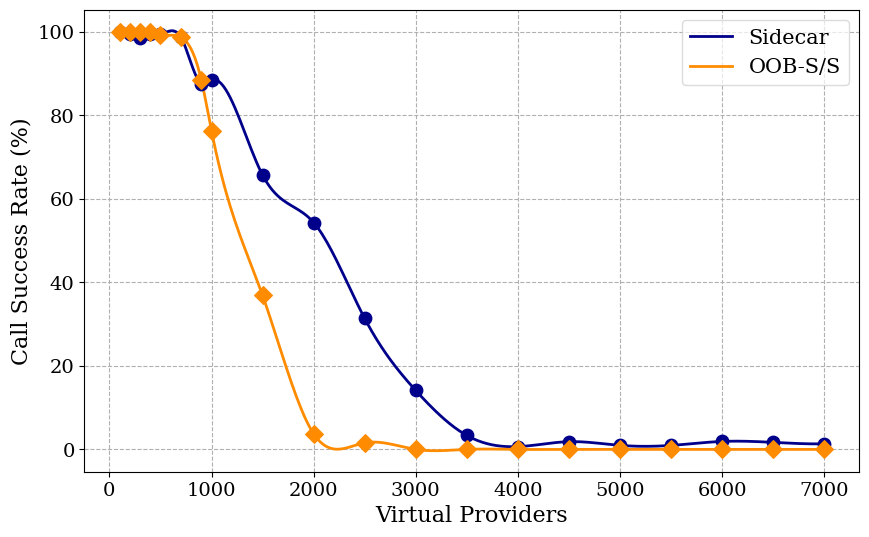

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from scipy.interpolate import make_interp_spline

oobss = 'oob-s/s'
jodi  = 'jodi'
name  = "Sidecar"

# Load the CSV file
df = pd.read_csv("../k6-sr.csv")

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size']   = 14  

labelFontSize=16
lagendFontSize=15

# Define custom colors and distinct markers for each protocol
colors  = { jodi: "darkblue",   oobss: "darkorange" }
markers = { jodi: "o",          oobss: "D" }  # circle for jodi, diamond for oobss

# Create figure
plt.figure(figsize=(10, 6))

for protocol in df["Protocol"].unique():
    subset     = df[df["Protocol"] == protocol]
    x          = subset["VUs"]
    y          = subset["Success-Rate"]
    proto_lbl  = name if protocol == jodi else protocol.upper()

    # Smooth the line if enough points
    if len(x) > 2:
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
        plt.plot(
            x_smooth, y_smooth,
            linestyle="-",
            color=colors[protocol],
            linewidth=2,
            label=proto_lbl
        )
    else:
        plt.plot(
            x, y,
            linestyle="-",
            color=colors[protocol],
            linewidth=2,
            label=proto_lbl
        )

    # Always overlay the raw data points with the protocol-specific marker
    plt.scatter(
        x, y,
        marker=markers[protocol],
        color=colors[protocol],
        s=80,
        zorder=3
    )

plt.xlabel("Virtual Providers", fontsize=labelFontSize)
plt.ylabel("Call Success Rate (%)", fontsize=labelFontSize)
plt.legend(
    fontsize=lagendFontSize,
    title_fontsize=lagendFontSize,
    framealpha=0.7,
)
plt.grid(True, linestyle='--', zorder=1)

# Save the figure as a high-resolution PDF
plt.savefig("../charts/throughput.pdf", dpi=300, bbox_inches='tight')

plt.show()
